In [97]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:

import sys
assert sys.version_info >= (3, 6)
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# consistent sized plots
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize']= 14
rcParams['xtick.labelsize'] =12
rcParams['ytick.labelsize'] = 12

# handle operating system dependencies
import os

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
os.chdir("/content/drive/My Drive/Group 7 _ Final Project/")
os.getcwd()

'/content/drive/My Drive/Group 7 _ Final Project'

In [100]:
# Read the training data and test data into Dataframes
train_credit = pd.read_csv('train.csv')
test_credit = pd.read_csv('test.csv')

In [101]:
train_credit.head(20)

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
5,6,1,8,4,0,3398,1,4,1,3,...,1,39,3,2,2,2,2,1,1,1
6,7,1,6,4,0,1361,1,2,2,3,...,1,40,3,2,1,2,1,1,1,1
7,8,4,18,4,3,1098,1,1,4,2,...,3,65,3,2,2,1,2,1,2,1
8,9,2,24,2,3,3758,3,1,1,2,...,4,23,3,1,1,1,2,1,2,1
9,10,1,11,4,0,3905,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1


In [102]:
train_credit.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [103]:
# assign the corresponding english column names
train_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test_credit.columns =  ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [104]:
# check the dataframe after rename of the columns
train_credit.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [105]:
train_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,800.0,478.10125,278.883661,0.0,238.75,472.0,707.25,999.0
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0


In [106]:
# check info
train_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

**Calculate missing Values**

In [107]:
# explicit check for any null values in the dataframe
train_credit.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

**Outlier detection**

Outliers in column 'duration': [ 8 11 11 11 11 42 33  4 47 27 14 39  4 39  5 11 54 11 27 60 42 42 28 11
 11 39  7 27 27 20 14 60 20 27  4  4  4  7  4 11 33 14 20  8 42 20 42  7
  8  8  7  8 20 60 60 45 42 60 42 60 20 28 60 33 42 72 60 39 60 27 60 42
 60 27 20 54 14]


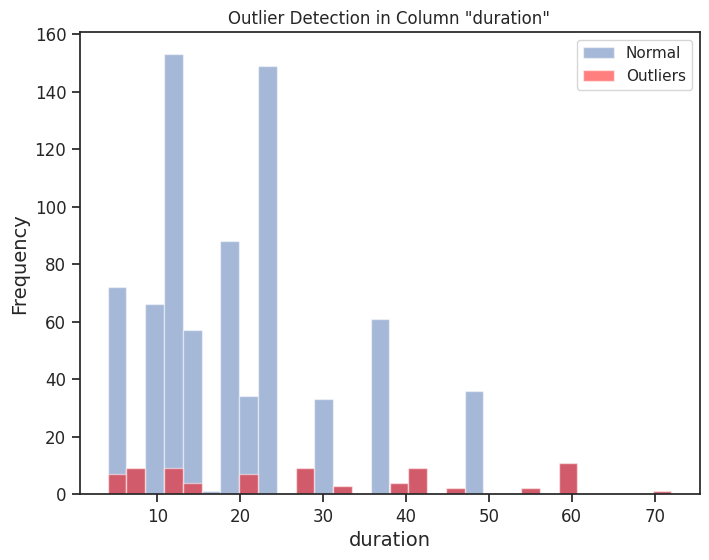

Outliers in column 'amount': [ 7582   385 10875   428   409  8858   392 12749  8072  8487  7721 12169
 10722  8613  8588  7678  8133   339  9436   250  7758   343 13756   276
   458   522 11760  7814  9566  8358  9857   362 10222  9055 12204 10623
  9277  7882 15857   368   484 10144   454 15653  8471  8947 11054  9157
  9283  7596 10974  7865  8229  7685 14555  8386   433 15672 10961 11938
 14782 12612  9398   433  7763  9034 14027  9629 12976 14421 10127 12389
 15945  8648   448 11998 18424  8978 12579 12680]


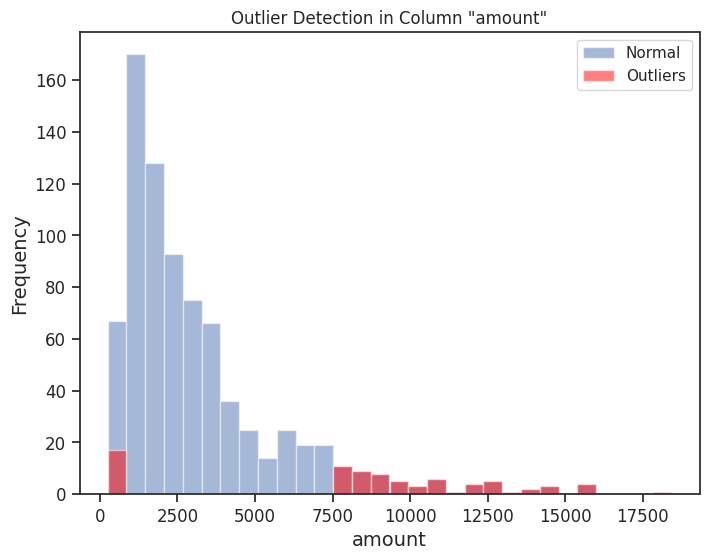

Outliers in column 'age': [21 65 56 58 61 58 63 60 58 60 63 59 61 64 74 74 64 74 20 20 19 65 63 63
 59 61 57 63 66 64 57 68 57 21 66 70 60 57 67 56 20 20 20 21 66 75 63 64
 20 21 21 57 67 20 65 21 61 63 21 66 58 60 61 61 63 19 60 21 57 20 57 61
 58 20 20]


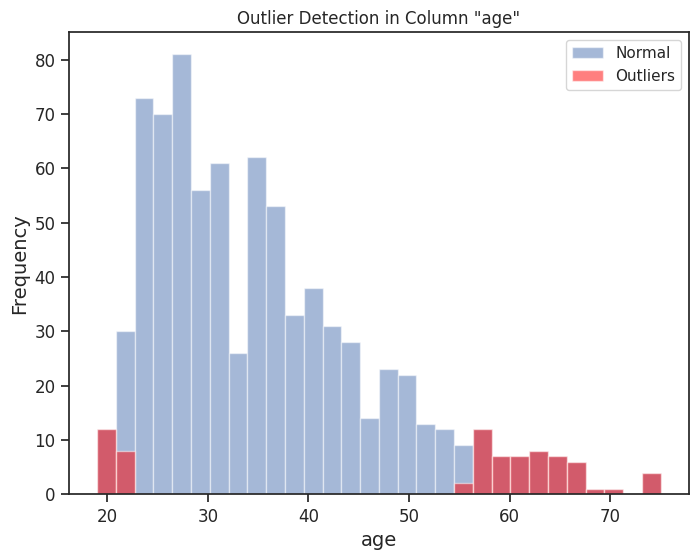

In [108]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

train_credit = pd.read_csv('train.csv')
train_credit.columns = ['Id', 'status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

# Define a list of numerical columns
numerical_columns = ['duration', 'amount', 'age']

# Perform outlier detection for each numerical column
for col in numerical_columns:
    # Extract the column values as a numpy array
    column_values = train_credit[col].values.reshape(-1, 1)

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=0.1, random_state=42)
    clf.fit(column_values)

    # Predict outliers
    outliers = clf.predict(column_values)

    # Identify and print the outliers
    outlier_indices = np.where(outliers == -1)[0]
    outlier_values = column_values[outlier_indices].flatten()
    print(f"Outliers in column '{col}': {outlier_values}")

    # Visualize the outliers
    plt.figure(figsize=(8, 6))
    plt.hist(column_values, bins=30, alpha=0.5, label='Normal')
    plt.hist(outlier_values, bins=30, alpha=0.5, color='red', label='Outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Outlier Detection in Column "{col}"')
    plt.legend()
    plt.show()


In [109]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


train_credit = pd.read_csv('train.csv')
train_credit.columns = ['Id', 'status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

# Define a list of numerical columns
numerical_columns = ['duration', 'amount', 'age']

# Dictionary to store the number of outliers in each numerical column
outliers_count = {}

# Perform outlier detection for each numerical column
for col in numerical_columns:
    # Extract the column values as a numpy array
    column_values = train_credit[col].values.reshape(-1, 1)

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=0.1, random_state=42)
    clf.fit(column_values)

    # Predict outliers
    outliers = clf.predict(column_values)

    # Count the number of outliers
    num_outliers = np.sum(outliers == -1)
    outliers_count[col] = num_outliers

# Print the number of outliers in each numerical column
print("Number of outliers in each numerical column:")
for col, count in outliers_count.items():
    print(f"Column '{col}': {count} outliers")


Number of outliers in each numerical column:
Column 'duration': 77 outliers
Column 'amount': 80 outliers
Column 'age': 75 outliers


**Descriptive Analysis**

---



**Distribution of credit Risk**

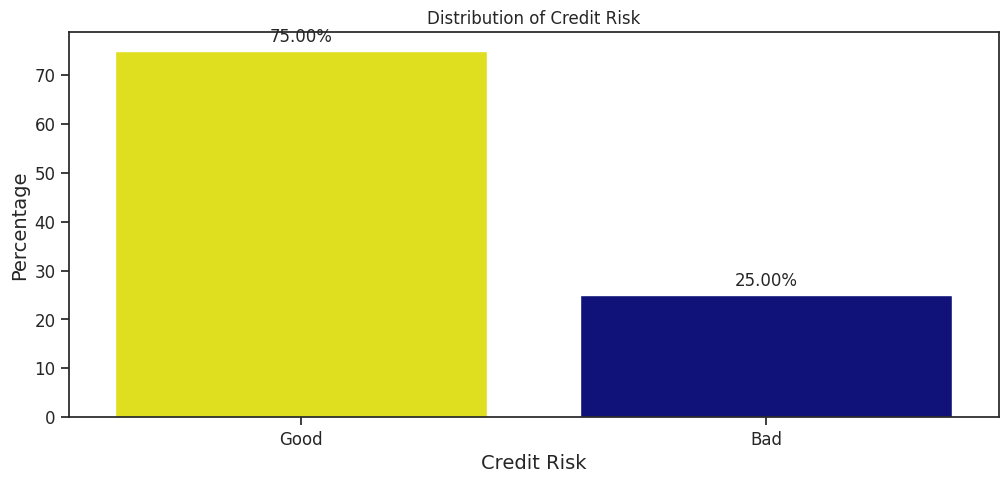

In [110]:
# Define custom color palette
custom_palette = sns.color_palette(["yellow", "darkblue"])

train_credit['credit_risk_label'] = train_credit['credit_risk'].map({0: 'Bad', 1: 'Good'})

# Calculate percentage of each category
percentage_data = train_credit['credit_risk_label'].value_counts(normalize=True) * 100

# Plotting the bar plot with custom palette
ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=custom_palette)
plt.xlabel('Credit Risk')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Risk')
# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* As expected there are way more people with good credit compare to bad credit risk

* The dataset is not balanced and accuracy of the model won't be good indication unless trained with balanced data

**Distribution of status**

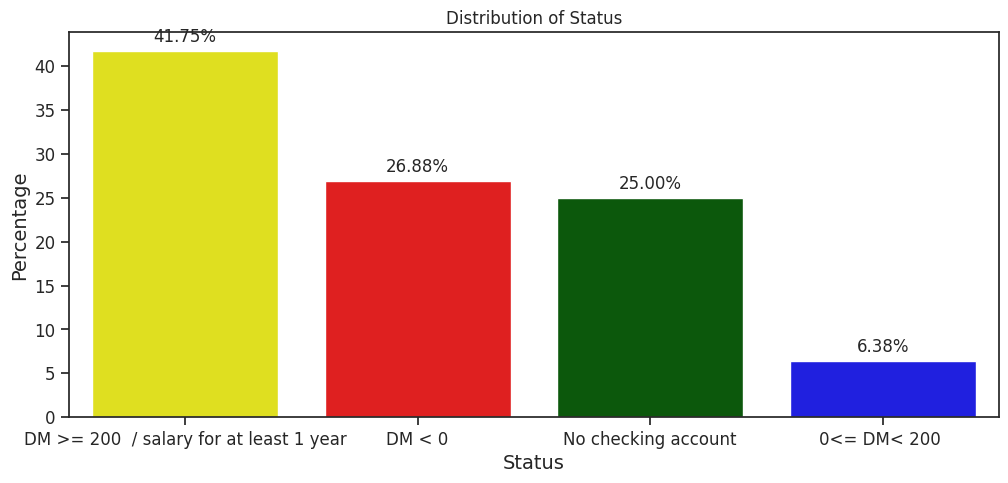

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette with dark green and blue
custom_palette_status = sns.color_palette(["yellow", "red","darkgreen","blue"])

train_credit['status_label'] = train_credit['status'].map({
    1: 'No checking account',
    2: 'DM < 0',
    3: '0<= DM< 200 ',
    4: 'DM >= 200  / salary for at least 1 year'
})

# Calculate percentage of each status category
percentage_data_status = train_credit['status_label'].value_counts(normalize=True) * 100

# Plotting the bar plot for status with custom palette
ax_status = sns.barplot(x=percentage_data_status.index, y=percentage_data_status.values, palette=custom_palette_status)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Distribution of Status')
# Adding percentage labels to the bars
for p in ax_status.patches:
    ax_status.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


**Distribution of foreign_worker**

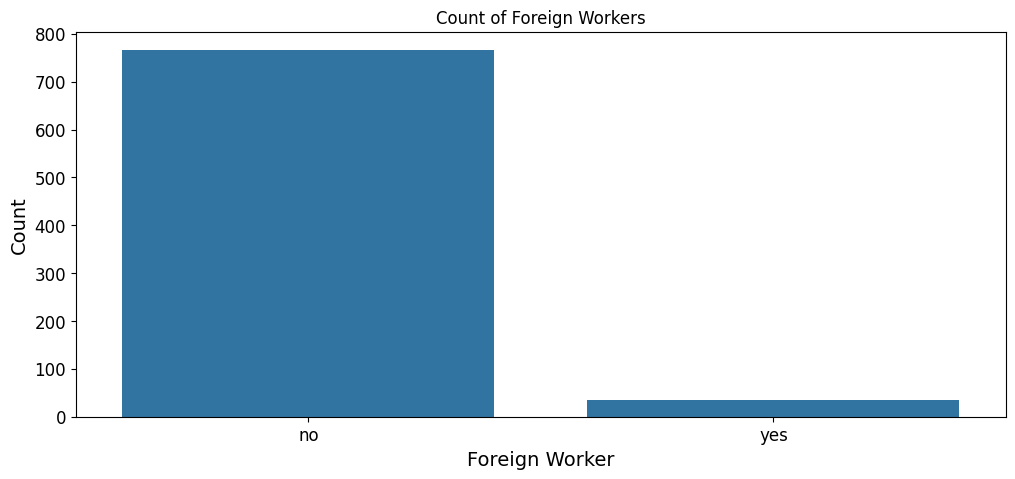

In [ ]:
train_credit['foreign_worker_label'] = train_credit['foreign_worker'].map({1: 'yes', 2: 'no'})

# Creating the count plot for foreign worker labels
sns.countplot(x='foreign_worker_label', data=train_credit)
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.title('Count of Foreign Workers')
plt.show()

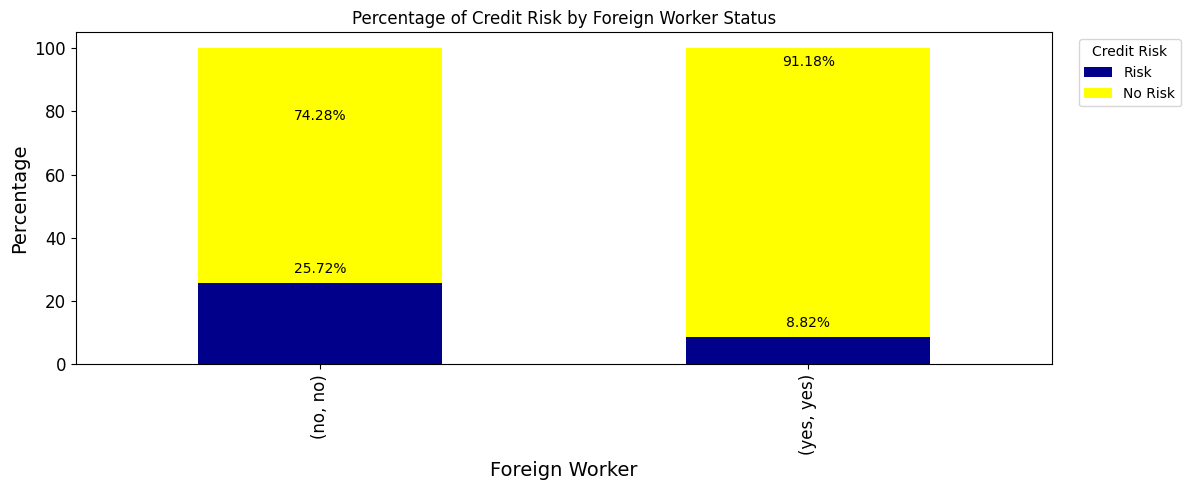

In [ ]:
train_credit['foreign_worker_label'] = train_credit['foreign_worker'].map({1: 'yes', 2: 'no'})

# Calculate percentage of each category for each credit risk type
percentage_data = train_credit.groupby(['foreign_worker_label', 'credit_risk']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plotting the bar plot with custom palette
ax = percentage_data.plot(kind='bar', stacked=True, color=["darkblue", "yellow"])
plt.xlabel('Foreign Worker')
plt.ylabel('Percentage')
plt.title('Percentage of Credit Risk by Foreign Worker Status')

# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding legend to the top right
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'], bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

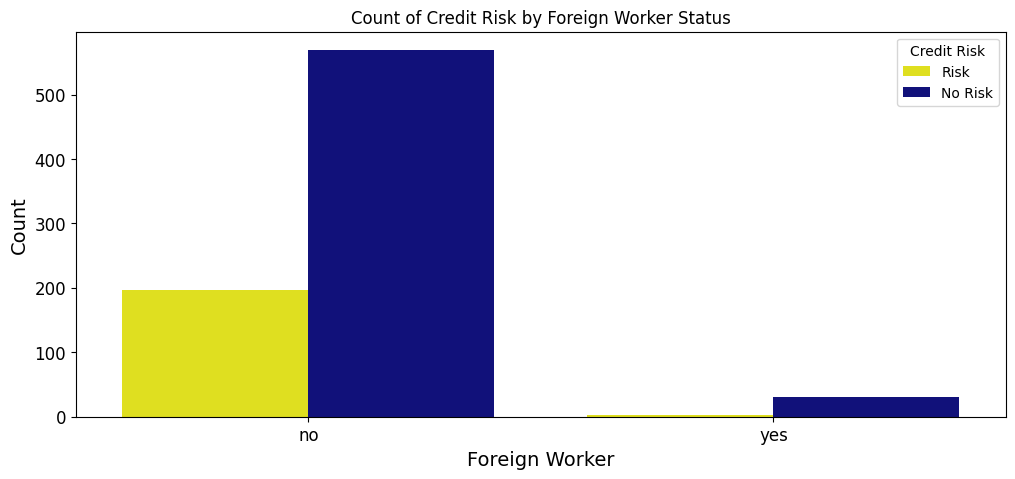

In [ ]:
train_credit['foreign_worker_label'] = train_credit['foreign_worker'].map({1: 'yes', 2: 'no'})
custom_palette = sns.color_palette(["yellow", "darkblue"])

# Creating the count plot
sns.countplot(x='foreign_worker_label', hue='credit_risk', data=train_credit,palette=custom_palette)
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Foreign Worker Status')
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'])
plt.show()

**Credit Risk vs Status**

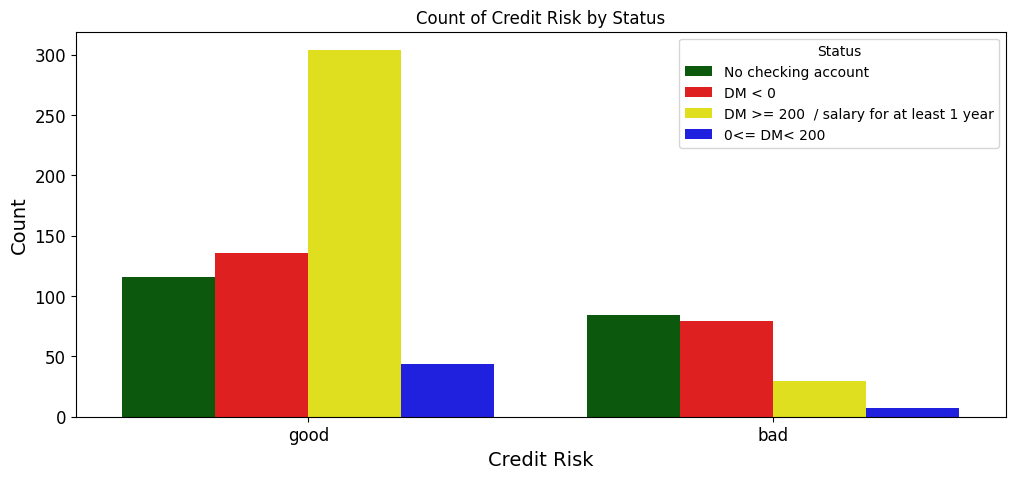

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette with darkgreen, red, yellow, and blue
custom_palette_status = sns.color_palette(["darkgreen", "red", "yellow", "blue"])

train_credit['credit_risk_label'] = train_credit['credit_risk'].map({0: 'bad', 1: 'good'})

# Mapping for the 'status' variable
status_mapping = {
    1: 'No checking account',
    2: 'DM < 0',
    3: '0<= DM< 200 ',
    4: 'DM >= 200  / salary for at least 1 year'
}
train_credit['status_label'] = train_credit['status'].map(status_mapping)

# Creating the count plot with hue for status using custom palette
sns.countplot(x='credit_risk_label', hue='status_label', data=train_credit, palette=custom_palette_status)
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Status')
plt.legend(title='Status')
plt.show()


**Credit Risk vs Purpose**

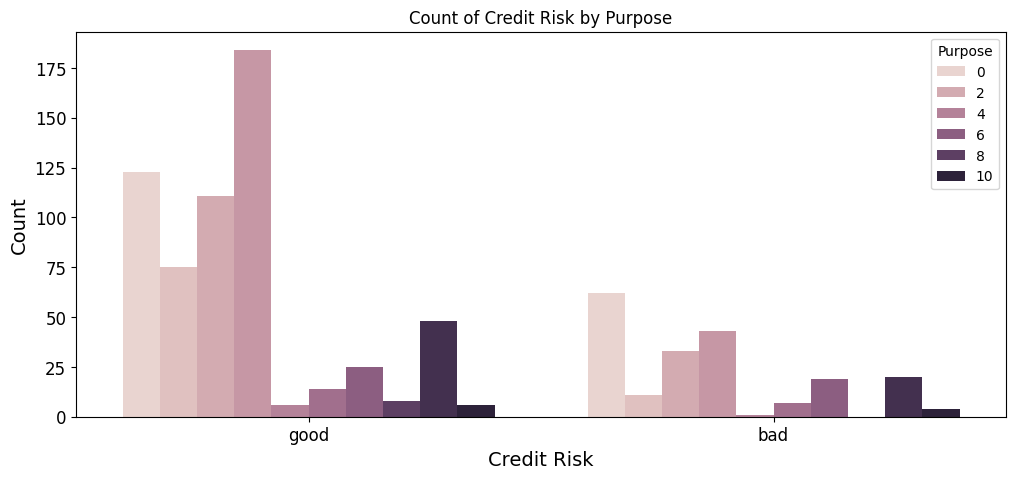

In [ ]:
train_credit['credit_risk_label'] = train_credit['credit_risk'].map({0: 'bad', 1: 'good'})

# Creating the count plot
sns.countplot(x='credit_risk_label', hue='purpose', data=train_credit)
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Purpose')
plt.legend(title='Purpose')
plt.show()

**Distribution of Amount**

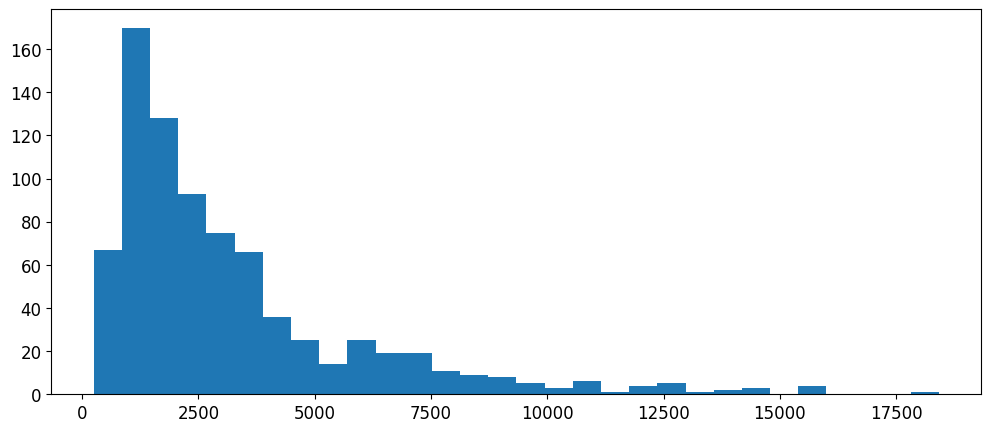

In [ ]:
plt.hist(train_credit['amount'],bins=30);

Check the bad loans

In [ ]:
train_credit[train_credit['credit_risk']==0]

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,credit_risk_label,status_label,foreign_worker_label
600,45,1,18,2,0,1216,1,2,4,2,...,1,1,3,2,2,2,0,bad,No checking account,no
601,47,4,18,4,6,1864,2,3,4,2,...,2,2,3,2,1,2,0,bad,DM >= 200 / salary for at least 1 year,no
602,171,1,12,2,0,1228,1,3,4,2,...,2,1,2,2,1,2,0,bad,No checking account,no
603,234,2,12,2,0,685,1,4,2,4,...,2,1,2,2,1,2,0,bad,DM < 0,no
604,304,3,9,2,3,745,1,3,3,2,...,2,1,2,2,1,2,0,bad,0<= DM< 200,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,993,1,18,4,0,3966,1,5,1,2,...,1,3,3,2,2,2,0,bad,No checking account,no
796,994,1,12,0,3,6199,1,3,4,3,...,1,2,3,2,2,2,0,bad,No checking account,no
797,997,4,21,4,0,12680,5,5,4,3,...,3,1,4,2,2,2,0,bad,DM >= 200 / salary for at least 1 year,no
798,998,2,12,2,3,6468,5,1,2,3,...,2,1,4,2,2,2,0,bad,DM < 0,no


Bad Loans Amont Histogram

Text(0.5, 1.0, 'Bad Loans Amount Histogram')

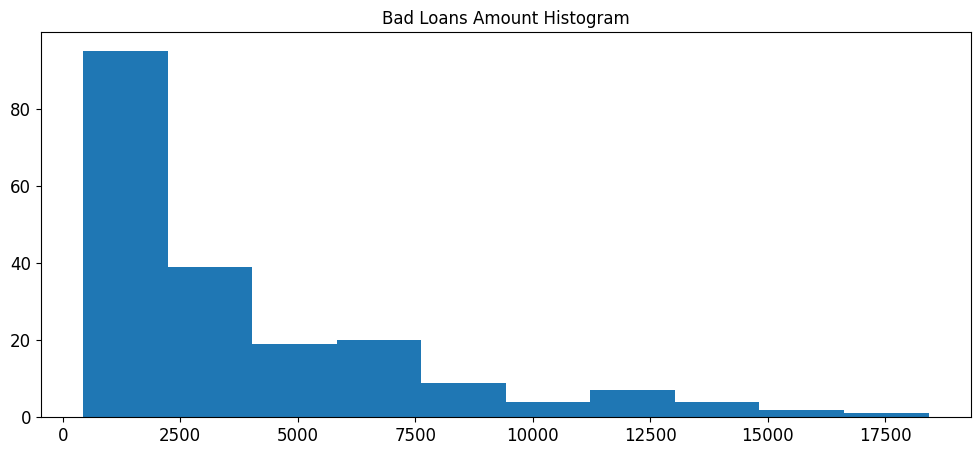

In [ ]:
plt.hist(train_credit[train_credit['credit_risk']==0]['amount'])
plt.title('Bad Loans Amount Histogram')

* The badloans is right skewed and with maximum bad loans under 7500
* Highest bad loan could be for the business (can be checked quickly)

In [ ]:
# check the good and bad loan risk
train_credit['credit_risk'].value_counts()

credit_risk
1    600
0    200
Name: count, dtype: int64

In [ ]:
# drop the Id column as it is not useful for the model
train_credit.drop(['Id'],inplace=True,axis=1)

In [ ]:
train_credit.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,credit_risk_label,status_label,foreign_worker_label
0,1,18,4,2,1049,1,2,4,2,1,...,1,1,3,2,1,2,1,good,No checking account,no
1,1,9,4,0,2799,1,3,2,3,1,...,1,2,3,1,1,2,1,good,No checking account,no
2,2,12,2,9,841,2,4,2,2,1,...,1,1,2,2,1,2,1,good,DM < 0,no


<ipython-input-40-e87ea255cf4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_amount,bins=20)


<Axes: xlabel='amount', ylabel='Density'>

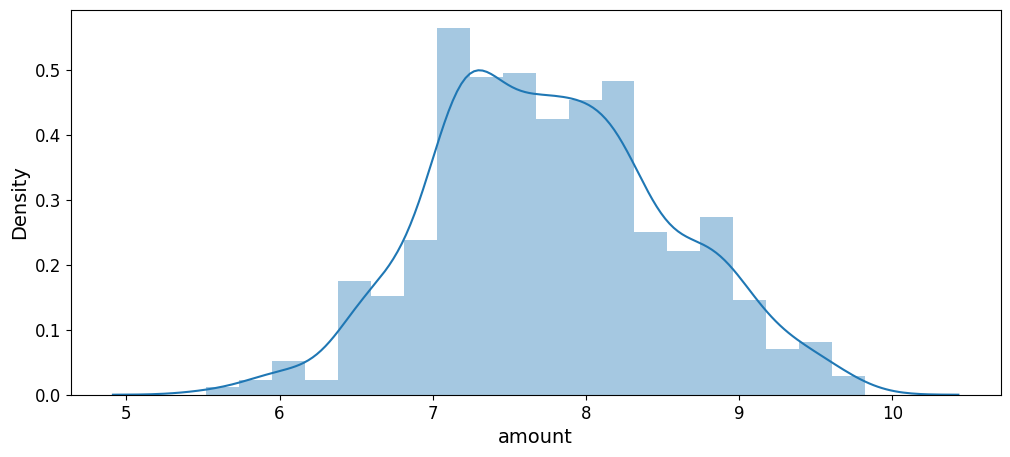

In [ ]:
log_amount = np.log(train_credit['amount'])
sns.distplot(log_amount,bins=20)

In [ ]:
for i in train_credit.columns:
    print(train_credit[i].value_counts())

status
4    334
2    215
1    200
3     51
Name: count, dtype: int64
duration
24    149
12    140
18     88
6      65
36     61
15     53
9      41
48     36
30     33
10     25
21     25
60     11
11      9
42      9
27      7
20      7
4       6
8       5
14      4
39      4
13      4
7       4
33      3
22      2
54      2
28      2
47      1
5       1
16      1
45      1
72      1
Name: count, dtype: int64
credit_history
2    408
4    250
3     70
1     40
0     32
Name: count, dtype: int64
purpose
3     227
0     185
2     144
1      86
9      68
6      44
5      21
10     10
8       8
4       7
Name: count, dtype: int64
amount
1262    3
1478    3
1258    3
1393    3
1743    2
       ..
2404    1
1554    1
1283    1
1747    1
6350    1
Name: count, Length: 754, dtype: int64
savings
1    470
5    149
2     86
3     52
4     43
Name: count, dtype: int64
employment_duration
3    258
5    207
4    145
2    137
1     53
Name: count, dtype: int64
installment_rate
4    379
2    183
3    

In [ ]:
train_credit.drop('credit_risk_label',axis=1,inplace=True)
train_credit.drop('foreign_worker_label',axis=1,inplace=True)
train_credit.drop('status_label',axis=1,inplace=True)

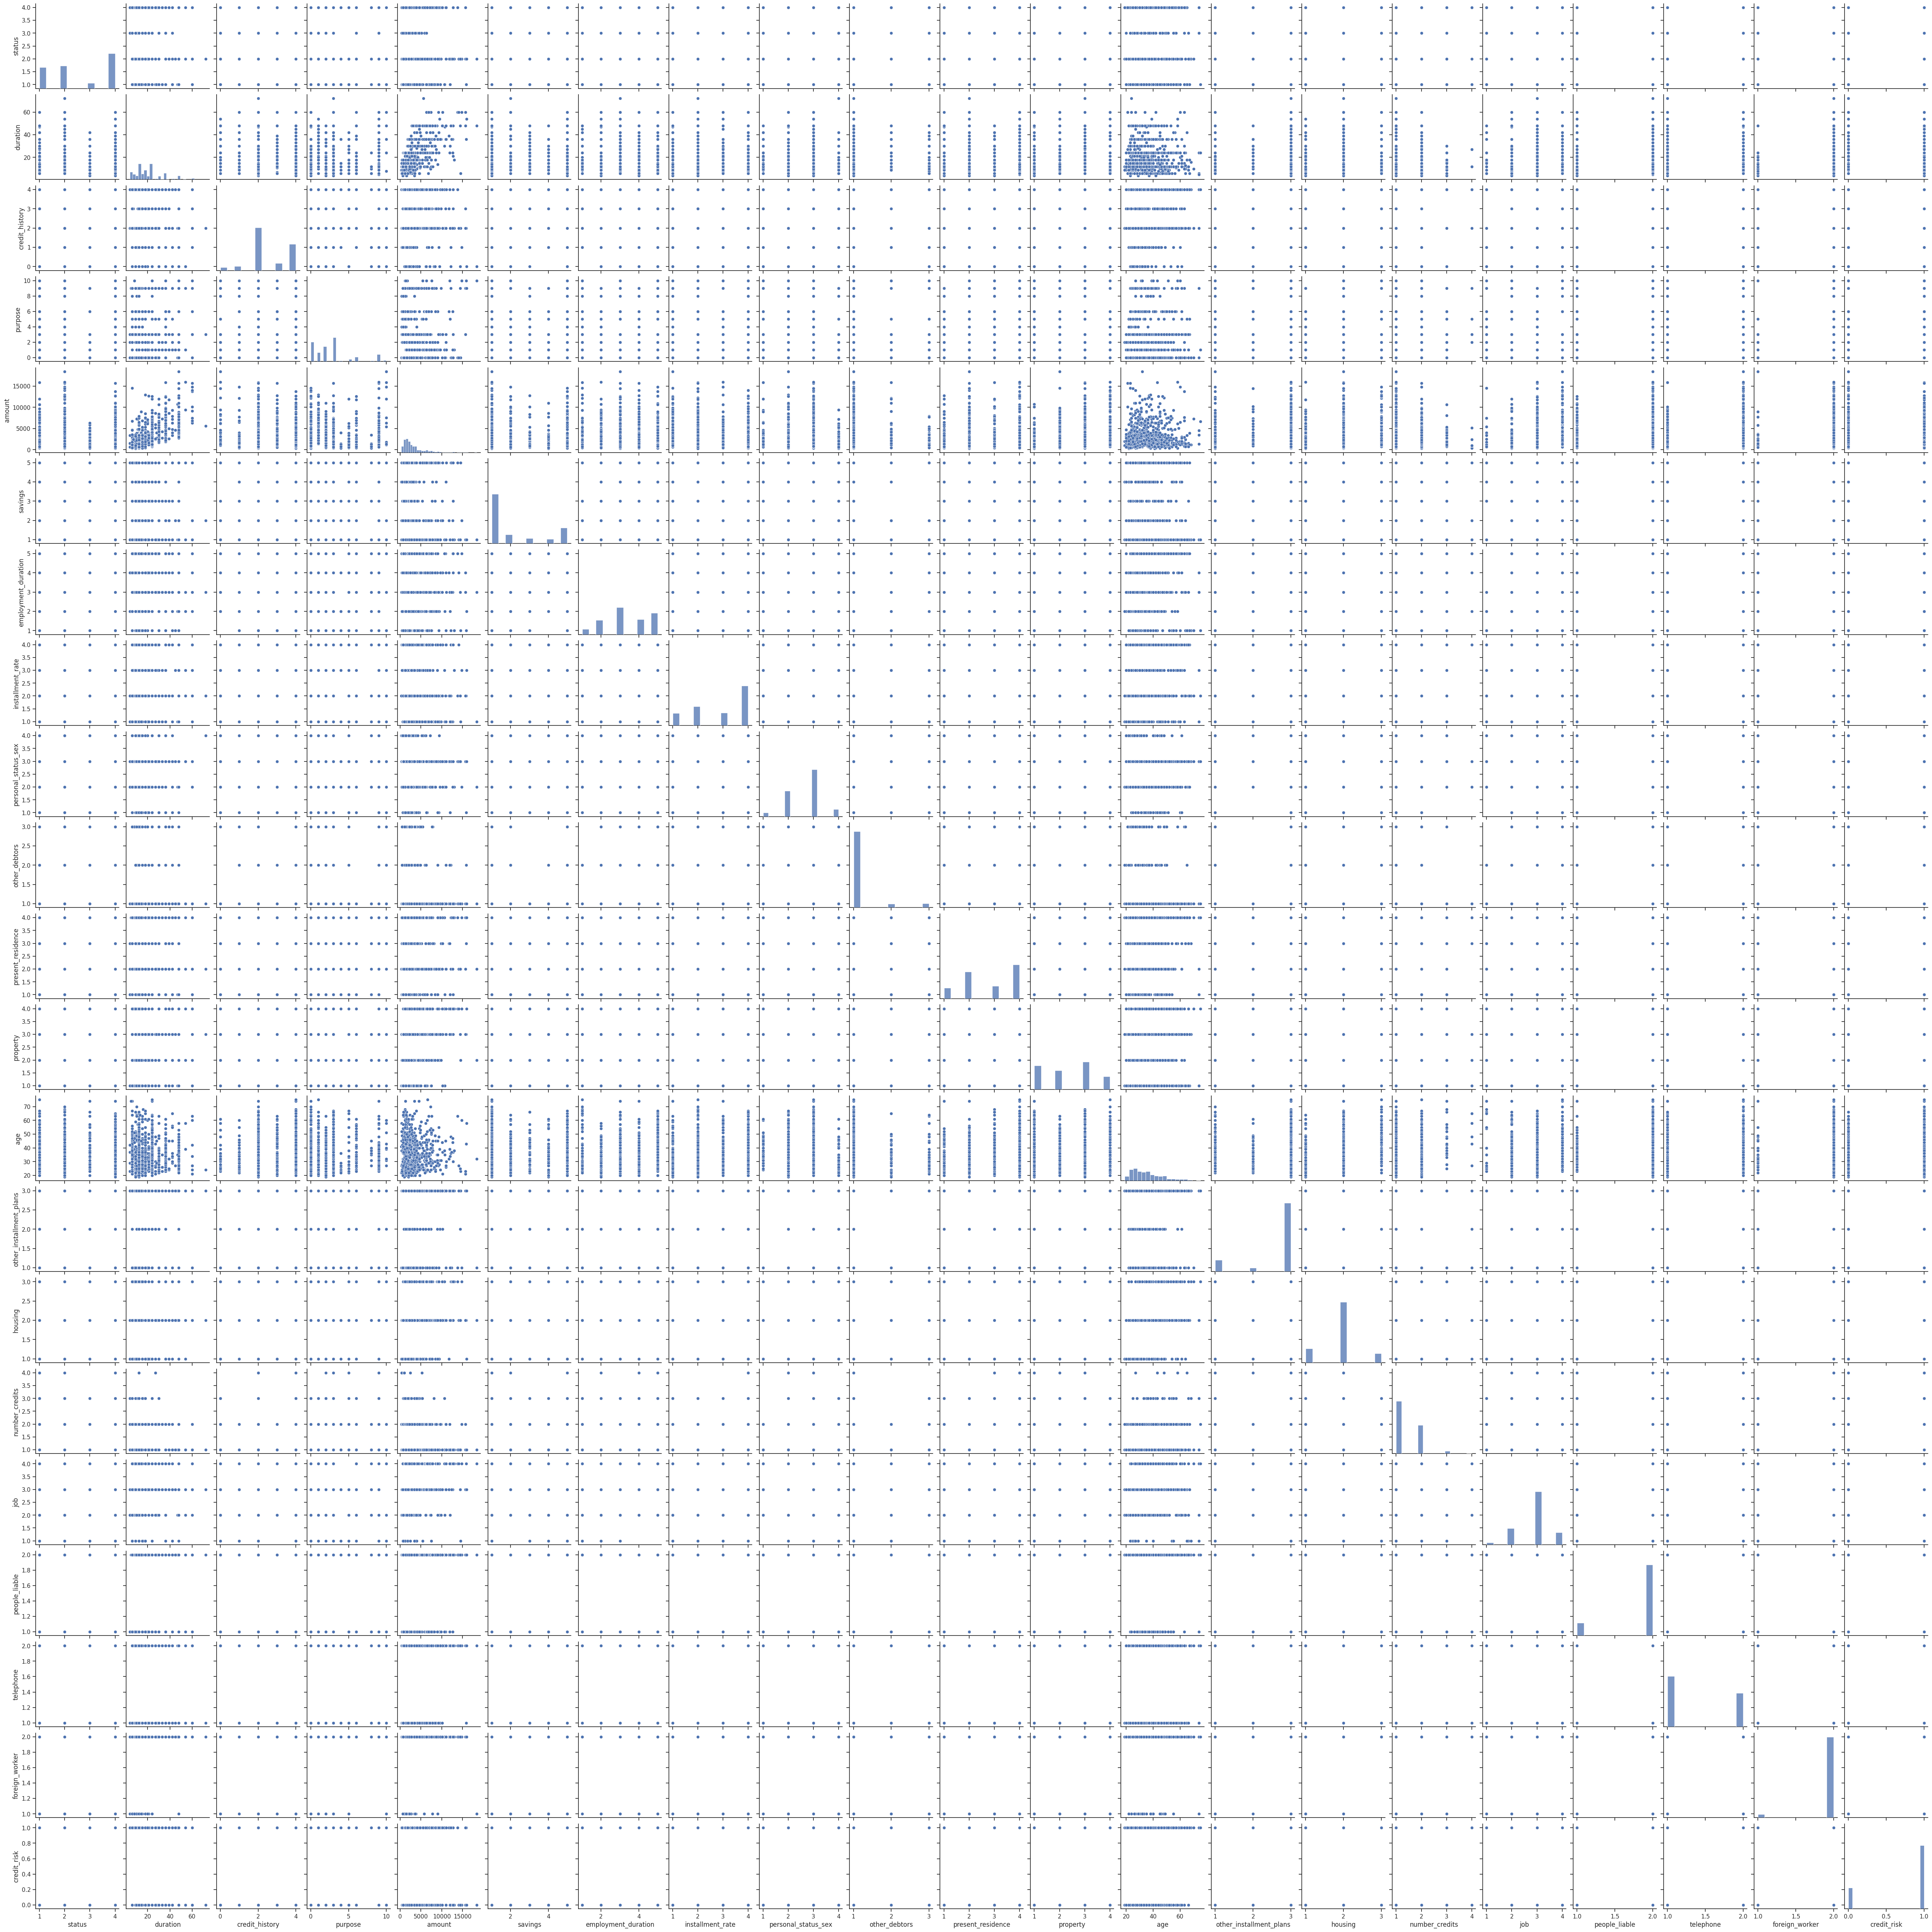

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train_credit)

**checking feature correlation**

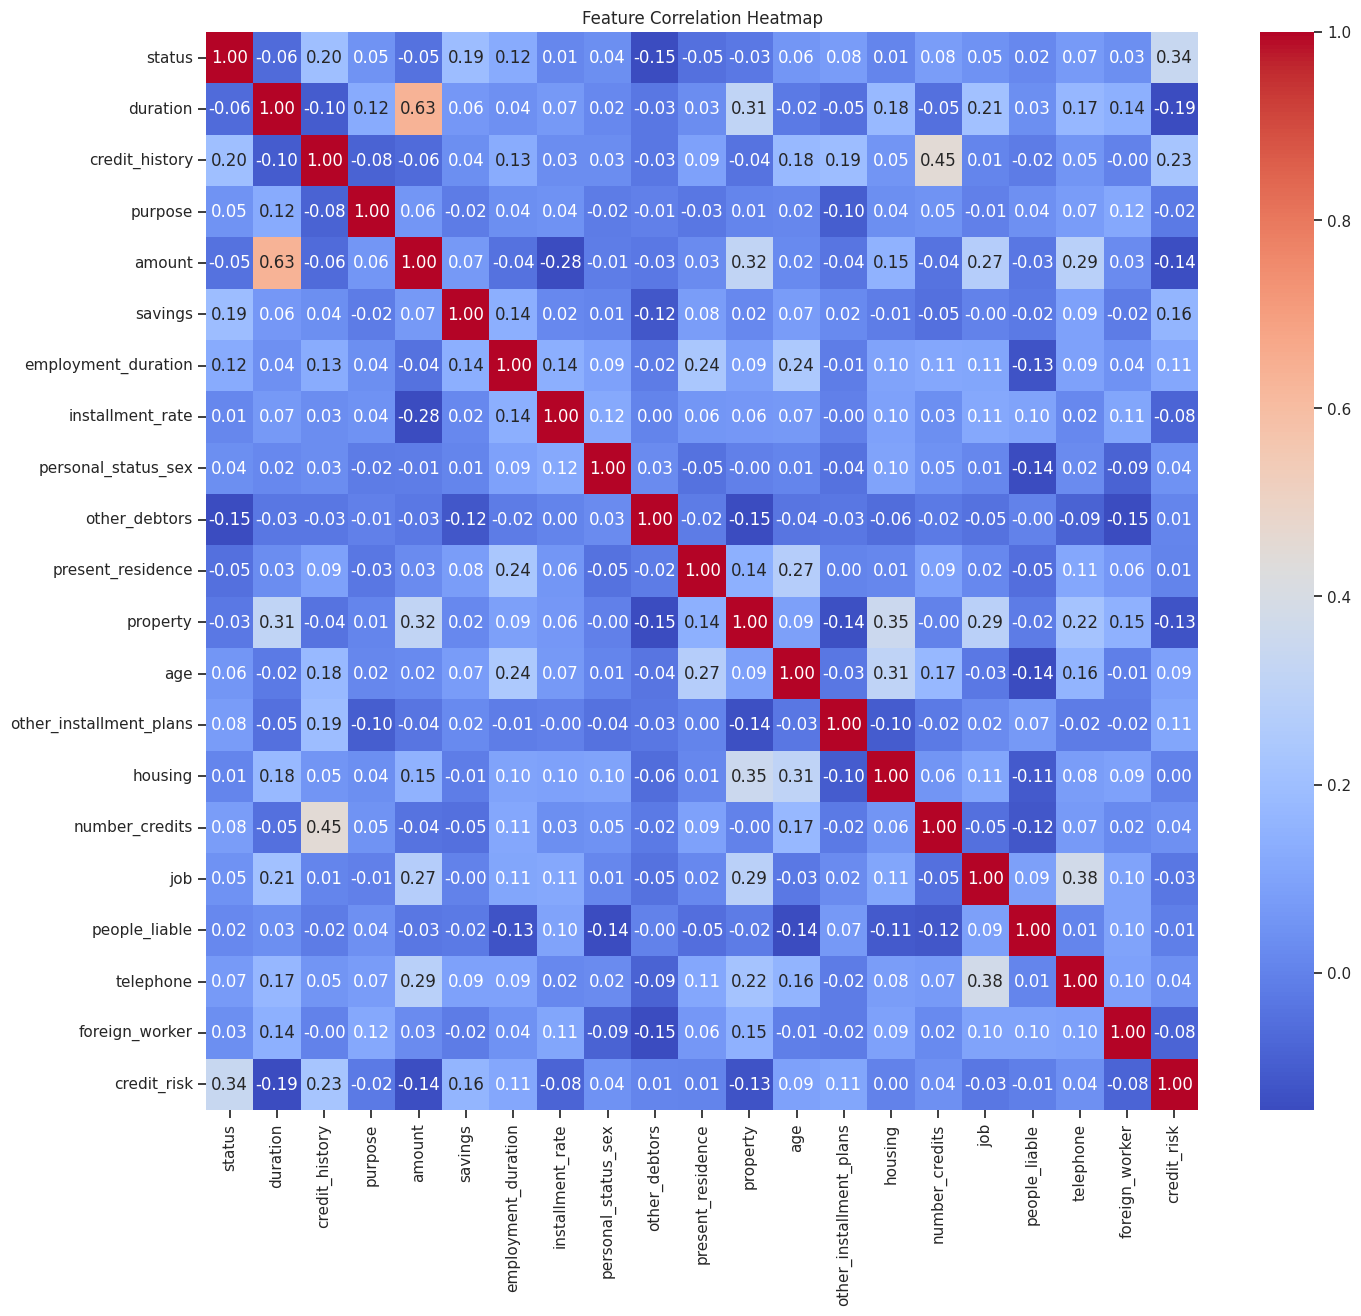

In [ ]:
# checking feature correlation
plt.figure(figsize=(16, 14))
sns.heatmap(train_credit.corr(), annot=True, cmap='coolwarm', fmt=".2f", robust=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Columns having least correlation with target column -

* present_residence
* housing
* other_installment_plans

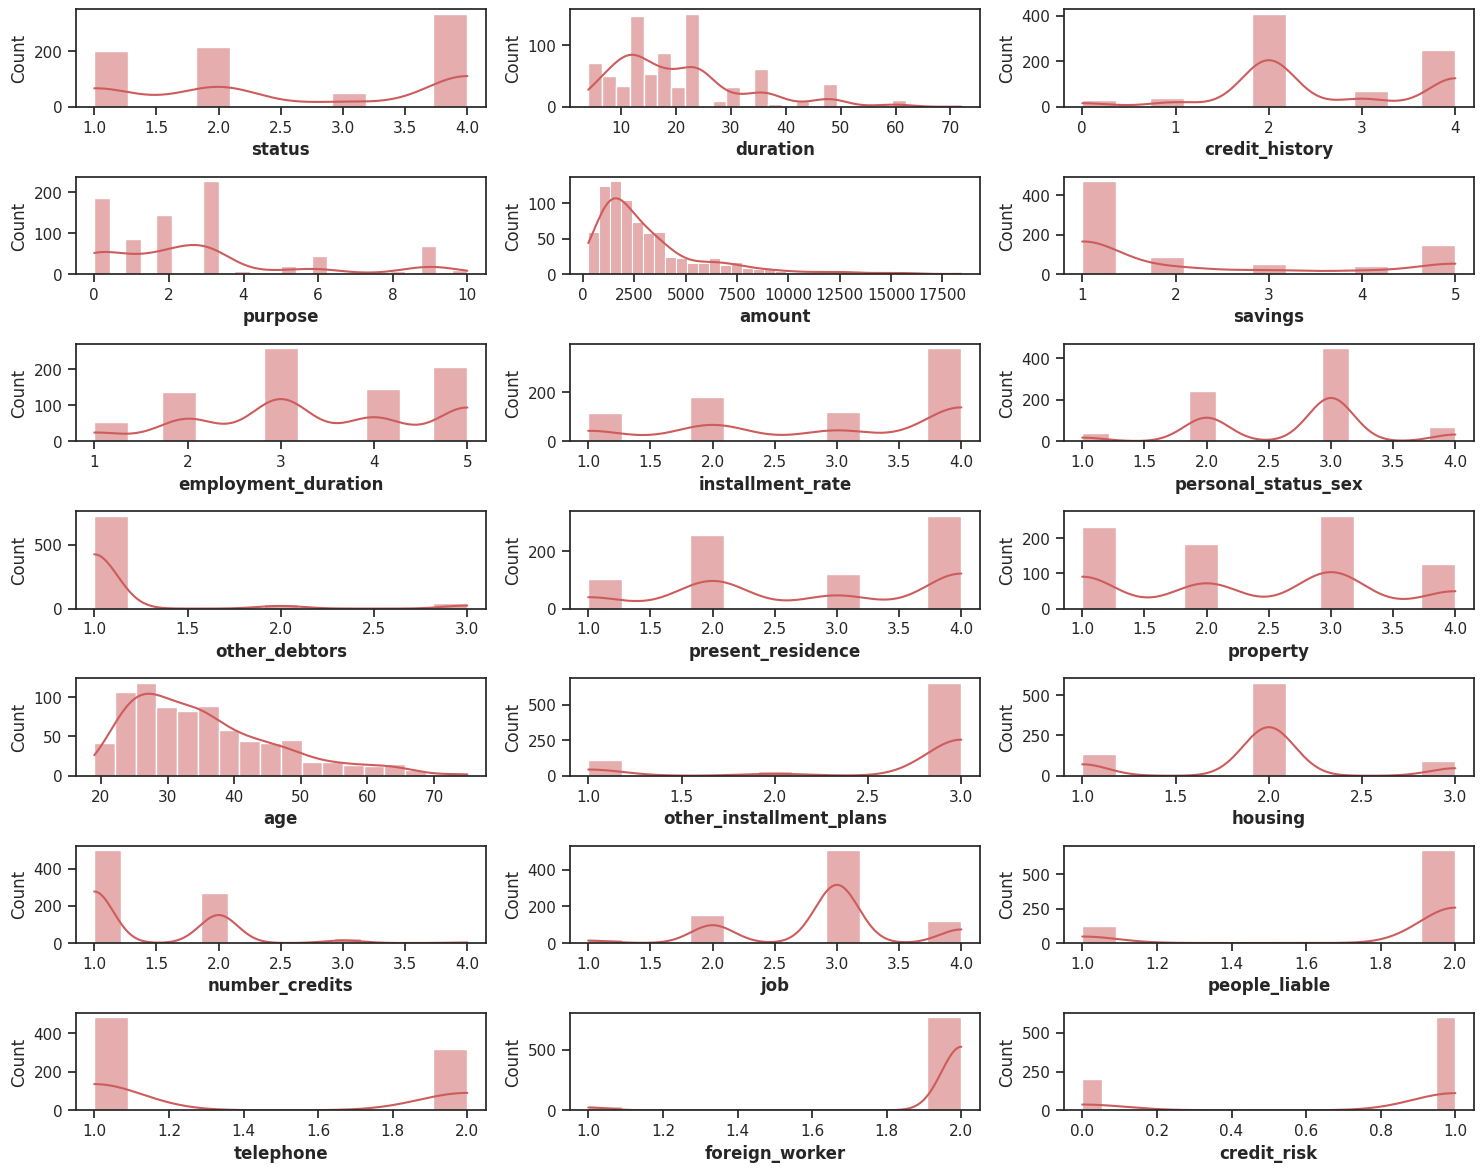

In [ ]:
# feature distribution

plt.figure(figsize=(15, 100))  # Set the overall figure size

for i, col in enumerate(train_credit.columns):
    plt.subplot(60, 3, i+1)  # Create a subplot for each column
    sns.histplot(train_credit[col], color='indianred', kde=True)  # Use sns.histplot for newer versions of Seaborn
    plt.xlabel(col, weight='bold')  # Set the column name as the x-axis label
    plt.tight_layout()  # Adjust subplot parameters for better layout

plt.show()  # Show the plot

Data distribution

* Continuous and chi-distributed data columns -> "duration", "amount" and "age"
* most of data columns are multi-model and categorical

In [ ]:
test_credit.shape

(200, 22)

In [ ]:
test_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       200 non-null    int64
 1   status                   200 non-null    int64
 2   duration                 200 non-null    int64
 3   credit_history           200 non-null    int64
 4   purpose                  200 non-null    int64
 5   amount                   200 non-null    int64
 6   savings                  200 non-null    int64
 7   employment_duration      200 non-null    int64
 8   installment_rate         200 non-null    int64
 9   personal_status_sex      200 non-null    int64
 10  other_debtors            200 non-null    int64
 11  present_residence        200 non-null    int64
 12  property                 200 non-null    int64
 13  age                      200 non-null    int64
 14  other_installment_plans  200 non-null    int64
 15  housin

In [ ]:
test_credit.head()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,4,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,3,23,3,1,2,2,2,1,2,1
2,18,2,36,4,3,2337,1,5,4,3,...,1,36,3,2,1,3,2,1,2,1
3,20,1,6,4,0,3676,1,3,1,3,...,1,37,3,1,3,3,1,1,2,1
4,22,2,36,2,5,2384,1,2,4,3,...,4,33,3,1,1,2,2,1,2,1


In [ ]:
test_credit.describe()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,585.095000,2.290000,22.530000,2.395000,3.000000,3515.080000,1.950,3.340000,3.055000,2.660000,...,2.375000,35.540000,2.68000,1.875000,1.355000,2.915000,1.845000,1.425000,1.985000,1.0
std,311.895834,1.246462,12.158877,1.001995,2.987411,2933.884667,1.536,1.144969,1.052384,0.753151,...,1.024511,12.063834,0.69282,0.539286,0.538913,0.624278,0.362813,0.495584,0.121857,0.0
min,4.000000,1.000000,6.000000,0.000000,0.000000,338.000000,1.000,1.000000,1.000000,1.000000,...,1.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,303.000000,1.000000,12.000000,2.000000,1.000000,1373.500000,1.000,3.000000,2.000000,2.000000,...,1.000000,26.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.0
50%,661.000000,2.000000,19.000000,2.000000,2.000000,2443.000000,1.000,3.000000,3.000000,3.000000,...,2.000000,33.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.0
75%,857.500000,4.000000,30.000000,3.000000,3.000000,4572.500000,2.250,4.000000,4.000000,3.000000,...,3.000000,41.250000,3.00000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.0
max,996.000000,4.000000,60.000000,4.000000,10.000000,14896.000000,5.000,5.000000,4.000000,4.000000,...,4.000000,75.000000,3.00000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.0


In [ ]:
for i in test_credit.columns:
    print(test_credit[i].value_counts())

Id
4      1
833    1
796    1
798    1
800    1
      ..
444    1
456    1
462    1
472    1
996    1
Name: count, Length: 200, dtype: int64
status
1    74
4    60
2    54
3    12
Name: count, dtype: int64
duration
12    39
24    35
18    25
36    22
48    12
15    11
6     10
9      8
30     7
27     6
21     5
45     4
10     3
42     2
60     2
8      2
40     1
7      1
28     1
26     1
20     1
39     1
16     1
Name: count, dtype: int64
credit_history
2    122
4     43
3     18
1      9
0      8
Name: count, dtype: int64
purpose
3     53
0     49
2     37
9     29
1     17
6      6
4      5
10     2
5      1
8      1
Name: count, dtype: int64
amount
1344     2
1845     2
2171     1
7980     1
1908     1
        ..
14179    1
618      1
2629     1
3812     1
2303     1
Name: count, Length: 198, dtype: int64
savings
1    133
5     34
2     17
3     11
4      5
Name: count, dtype: int64
employment_duration
3    81
5    46
2    35
4    29
1     9
Name: count, dtype: int64
installmen

In [ ]:
x_test = test_credit.drop(columns="Id",axis=1)

In [ ]:
x_test.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
1,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,2,1,2,1
2,2,36,4,3,2337,1,5,4,3,1,...,1,36,3,2,1,3,2,1,2,1
3,1,6,4,0,3676,1,3,1,3,1,...,1,37,3,1,3,3,1,1,2,1
4,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,1


### **Prepare data for Machine Learning Models**

*     age can be converted to ordinal data, for simplicity went with log transformation
*     further improvement --> create data preparation and transformation pipeline

In [ ]:
# import the various classifier models

from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold

In [ ]:
new_data = train_credit.copy()

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   800 non-null    int64
 1   duration                 800 non-null    int64
 2   credit_history           800 non-null    int64
 3   purpose                  800 non-null    int64
 4   amount                   800 non-null    int64
 5   savings                  800 non-null    int64
 6   employment_duration      800 non-null    int64
 7   installment_rate         800 non-null    int64
 8   personal_status_sex      800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  present_residence        800 non-null    int64
 11  property                 800 non-null    int64
 12  age                      800 non-null    int64
 13  other_installment_plans  800 non-null    int64
 14  housing                  800 non-null    int64
 15  number

In [ ]:
new_data['log_amount'] = round(np.log(new_data['amount']),2)

In [ ]:
new_data.drop('amount',axis=1,inplace=True)

In [ ]:
new_data['log_age'] =  round(np.log(new_data['age']),2)
new_data['log_duration'] = round(np.log(new_data['duration']),2)
new_data.drop(['age','duration'],axis=1,inplace=True)
new_data.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,1,4,2,1,2,4,2,1,4,2,...,1,1,3,2,1,2,1,6.96,3.04,2.89
1,1,4,0,1,3,2,3,1,2,1,...,1,2,3,1,1,2,1,7.94,3.58,2.20
2,2,2,9,2,4,2,2,1,4,1,...,1,1,2,2,1,2,1,6.73,3.14,2.48
3,1,4,0,1,3,3,3,1,2,1,...,1,2,2,1,1,1,1,7.66,3.66,2.48
4,1,4,0,1,2,1,3,1,3,1,...,1,2,2,1,1,1,1,7.71,3.87,2.30


In [ ]:
new_data.tail()

,status,duration,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount
795,1,18,4,0,1,5,1,2,1,4,...,33,1,1,3,3,2,2,2,0,8.29
796,1,12,0,3,1,3,4,3,1,2,...,28,3,1,2,3,2,2,2,0,8.73
797,4,21,4,0,5,5,4,3,1,4,...,30,3,3,1,4,2,2,2,0,9.45
798,2,12,2,3,5,1,2,3,1,1,...,52,3,2,1,4,2,2,2,0,8.77
799,1,30,2,2,5,5,4,3,1,4,...,31,3,2,1,3,2,1,2,0,8.76


In [ ]:
X_full = new_data.drop('credit_risk',axis=1)
y_full = new_data['credit_risk']

* The data is organized where the last 200 rows has credit risk as 0
* Hence it is important to shuffle the dataset

In [ ]:
# this will ensure that the data is randomized and then split into train and test
# alternatively StratifiedRandomSplit is also recommended
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [ ]:
# try various models and pick the best one for further tuning
def cross_validate(X = X_train,y = y_train):

    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))


    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [ ]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.7765625,Std Dev: 0.03611820509913711
Model:GB,Mean: 0.7791666666666667,Std Dev: 0.04505735157058785
Model:SVC,Mean: 0.7578125,Std Dev: 0.0078125
Model:SGD,Mean: 0.7177083333333333,Std Dev: 0.09656648904022325
Model:LogReg,Mean: 0.7739583333333333,Std Dev: 0.04049123276161835
Model:AdaBoost,Mean: 0.7671875,Std Dev: 0.046060634290573985
Model:Bag,Mean: 0.7354166666666667,Std Dev: 0.04668944756461452
Model:xgboost,Mean: 0.7651041666666667,Std Dev: 0.046610946087146624
Model:Dtree,Mean: 0.7177083333333333,Std Dev: 0.058175008356013344


**Prepare the test data**

In [ ]:
test_sub = test_credit.copy()
test_sub.drop('Id',axis=1,inplace=True)
test_sub['log_amount'] = round(np.log(test_sub['amount']),2)
test_sub['log_age'] =  round(np.log(test_sub['age']),2)
test_sub['log_duration'] = round(np.log(test_sub['duration']),2)
test_sub.drop(['amount','age','duration'],axis=1,inplace=True)
test_sub.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,1,4,0,1,3,4,3,1,4,2,...,2,2,2,2,1,1,1,7.68,3.64,2.48
1,1,2,3,5,4,2,4,1,4,3,...,1,2,2,2,1,2,1,7.57,3.14,2.89
2,2,4,3,1,5,4,3,1,4,1,...,2,1,3,2,1,2,1,7.76,3.58,3.58
3,1,4,0,1,3,1,3,1,3,1,...,1,3,3,1,1,2,1,8.21,3.61,1.79
4,2,2,5,1,2,4,3,1,1,4,...,1,1,2,2,1,2,1,7.78,3.50,3.58


In [ ]:
# try various models and pick the best one for further tuning
def cross_validate(x = X_test,y = y_test):

    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))


    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,x,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [ ]:
cross_validate(X_test,y_test)

Model:RF,Mean: 0.7604166666666666,Std Dev: 0.09693658436776534
Model:GB,Mean: 0.7166666666666667,Std Dev: 0.10549157417643469
Model:SVC,Mean: 0.71875,Std Dev: 0.03125
Model:SGD,Mean: 0.6166666666666667,Std Dev: 0.17134070995793407
Model:LogReg,Mean: 0.7291666666666666,Std Dev: 0.08122328620674138
Model:AdaBoost,Mean: 0.7145833333333333,Std Dev: 0.11488596399135198
Model:Bag,Mean: 0.6958333333333333,Std Dev: 0.08343743497708662
Model:xgboost,Mean: 0.7208333333333333,Std Dev: 0.09780578828587919
Model:Dtree,Mean: 0.6666666666666666,Std Dev: 0.10248644896874037


**Balance the data by Oversampling using ADASYN Library**

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE # use either ADASYN or SMOTE
from collections import Counter

In [ ]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)

Counter({1: 485, 0: 500})

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8440184154469871,Std Dev: 0.03707487753084867
Model:GB,Mean: 0.8372088229231085,Std Dev: 0.041131978071834004
Model:SVC,Mean: 0.7756338899196044,Std Dev: 0.0358581537989254
Model:SGD,Mean: 0.6676973819830961,Std Dev: 0.10739139235314199
Model:LogReg,Mean: 0.7786607572321859,Std Dev: 0.039817709617136265
Model:AdaBoost,Mean: 0.7820758606472891,Std Dev: 0.04705257114554459
Model:Bag,Mean: 0.8142513571084999,Std Dev: 0.046303144150528934
Model:xgboost,Mean: 0.8568714354428639,Std Dev: 0.03519190232661102
Model:Dtree,Mean: 0.7715900501614787,Std Dev: 0.0353330702153052


In [ ]:
X_test_res,y_test_res = ada.fit_resample(X_test,y_test)

In [ ]:
cross_validate(X_test_res,y_test_res)

Model:RF,Mean: 0.8333333333333334,Std Dev: 0.0635866984593632
Model:GB,Mean: 0.8086956521739131,Std Dev: 0.06409665039853907
Model:SVC,Mean: 0.7159420289855073,Std Dev: 0.07252171596056119
Model:SGD,Mean: 0.717391304347826,Std Dev: 0.10694238153259862
Model:LogReg,Mean: 0.7855072463768116,Std Dev: 0.07355697124898274
Model:AdaBoost,Mean: 0.8,Std Dev: 0.07240577389447418
Model:Bag,Mean: 0.8043478260869567,Std Dev: 0.0799732154279501
Model:xgboost,Mean: 0.8086956521739131,Std Dev: 0.06409665039853907
Model:Dtree,Mean: 0.7463768115942029,Std Dev: 0.07784376233041035


Based on the above result we will use the best models to fit and predict the credit risk

**XGBoost**

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid=[{'booster': ['gbtree', 'dart'],
                          'learning_rate': [0.3, 0.5, 0.01, 0.1],
                          'max_depth': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'booster': 'gbtree', 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 30}

**Random Forest**

In [ ]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),

    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c2f90344df0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c2f99c00940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c2f7c2eb760>},
                   random_state=42, scoring='accuracy')

In [ ]:
rnd_search.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 386}

**hyper parameters selcted based on grid search** - SVM,GB,BAGGING,XGBOOST (for oversampling)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

log_reg = LogisticRegression(random_state=42)
bag_log_reg = BaggingClassifier(base_estimator=log_reg, random_state=42)

log_reg.fit(X_res, y_res)


LogisticRegression(random_state=42)

In [ ]:
# hyper parameters selcted based on grid search
xgb_clf =  XGBClassifier(n_estimators=30,max_depth=6,random_state=42,learning_rate=0.5,
                        booster='gbtree')
rf_clf = RandomForestClassifier(random_state=42,max_depth=8,max_features=6,n_estimators=386)
svc_clf = SVC(random_state=42)   # with default paramters
gb_clf = GradientBoostingClassifier(random_state=42) # default parameters
bag_clf = BaggingClassifier(random_state=42,base_estimator=XGBClassifier())
xgb_clf.fit(X_res,y_res)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

log_reg = LogisticRegression(random_state=42)
bag_log_reg = BaggingClassifier(base_estimator=log_reg, random_state=42)

log_reg.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [ ]:
rf_clf.fit(X_res,y_res)
RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)
svc_clf.fit(X_res,y_res)
SVC(random_state=42)
gb_clf.fit(X_res,y_res)
GradientBoostingClassifier(random_state=42)
bag_clf.fit(X_res,y_res)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                  random_state=42)

**Accuracy** (After hyper parameter tuning)

In [ ]:
predictions_train_xgb = xgb_clf.predict(X_train)
predictions_train_rf = rf_clf.predict(X_train)
predictions_train_svc = svc_clf.predict(X_train)
predictions_train_gb = gb_clf.predict(X_train)
predictions_train_bag = bag_clf.predict(X_train)
predictions_train_log_reg = log_reg.predict(X_train)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_train,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_train,predictions_train_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_train,predictions_train_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_train,predictions_train_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_train,predictions_train_gb)))
print('Accuracy LogisticRegression...{}'.format(accuracy_score(y_train, predictions_train_log_reg)))

Accuracy XGBoost...0.9984375
Accuracy RForest...0.909375
Accuracy SupportVector...0.721875
Accuracy GBoost...0.8890625
Accuracy Bagging...0.8890625
Accuracy LogisticRegression...0.74375


In [ ]:
predictions_test_xgb = xgb_clf.predict(X_test)
predictions_test_rf = rf_clf.predict(X_test)
predictions_test_svc = svc_clf.predict(X_test)
predictions_test_gb = gb_clf.predict(X_test)
predictions_test_bag = bag_clf.predict(X_test)
predictions_test_log_reg = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_test_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_test_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_test,predictions_test_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_test_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,predictions_test_gb)))
print('Accuracy LogisticRegression...{}'.format(accuracy_score(y_test, predictions_test_log_reg)))

Accuracy XGBoost...0.74375
Accuracy RForest...0.7125
Accuracy SupportVector...0.69375
Accuracy GBoost...0.7625
Accuracy Bagging...0.7625
Accuracy LogisticRegression...0.725


**RMSE** (After hyper parameter tuning)

In [ ]:
from sklearn.metrics import mean_squared_error

predictions_train_xgb = xgb_clf.predict(X_train)
predictions_train_rf = rf_clf.predict(X_train)
predictions_train_svc = svc_clf.predict(X_train)
predictions_train_gb = gb_clf.predict(X_train)
predictions_train_bag = bag_clf.predict(X_train)
predictions_train_log_reg = log_reg.predict(X_train)

# Define the RMSE function
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

print('RMSE XGBoost: {}'.format(calculate_rmse(y_train, predictions_train_xgb)))
print('RMSE RForest: {}'.format(calculate_rmse(y_train, predictions_train_rf)))
print('RMSE SupportVector: {}'.format(calculate_rmse(y_train, predictions_train_svc)))
print('RMSE GBoost: {}'.format(calculate_rmse(y_train, predictions_train_gb)))
print('RMSE Bagging: {}'.format(calculate_rmse(y_train, predictions_train_bag)))
print('RMSE LogRegression: {}'.format(calculate_rmse(y_train, predictions_train_log_reg)))

RMSE XGBoost: 0.03952847075210474
RMSE RForest: 0.3010398644698074
RMSE SupportVector: 0.5273755777432246
RMSE GBoost: 0.3330728148618557
RMSE Bagging: 0.11180339887498948
RMSE LogRegression: 0.5062114182829146


In [ ]:
from sklearn.metrics import mean_squared_error

predictions_test_xgb = xgb_clf.predict(X_test)
predictions_test_rf = rf_clf.predict(X_test)
predictions_test_svc = svc_clf.predict(X_test)
predictions_test_gb = gb_clf.predict(X_test)
predictions_test_bag = bag_clf.predict(X_test)
predictions_test_log_reg = log_reg.predict(X_test)

# Define the RMSE function
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

print('RMSE XGBoost: {}'.format(calculate_rmse(y_test, predictions_test_xgb)))
print('RMSE RForest: {}'.format(calculate_rmse(y_test, predictions_test_rf)))
print('RMSE SupportVector: {}'.format(calculate_rmse(y_test, predictions_test_svc)))
print('RMSE GBoost: {}'.format(calculate_rmse(y_test, predictions_test_gb)))
print('RMSE Bagging: {}'.format(calculate_rmse(y_test, predictions_test_bag)))
print('RMSE LogRegression: {}'.format(calculate_rmse(y_test, predictions_test_log_reg)))

RMSE XGBoost: 0.5062114182829146
RMSE RForest: 0.5361902647381804
RMSE SupportVector: 0.5533985905294664
RMSE GBoost: 0.48733971724044817
RMSE Bagging: 0.5062114182829146
RMSE LogRegression: 0.5244044240850758


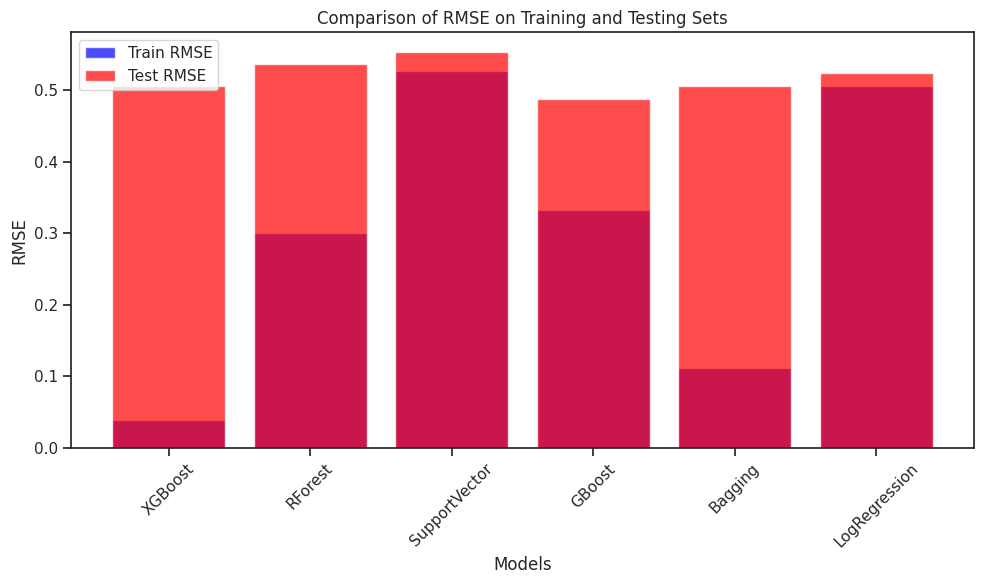

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate predictions for the training and testing sets
predictions_train_xgb = xgb_clf.predict(X_train)
predictions_train_rf = rf_clf.predict(X_train)
predictions_train_svc = svc_clf.predict(X_train)
predictions_train_gb = gb_clf.predict(X_train)
predictions_train_bag = bag_clf.predict(X_train)
predictions_train_log_reg = log_reg.predict(X_train)

predictions_test_xgb = xgb_clf.predict(X_test)
predictions_test_rf = rf_clf.predict(X_test)
predictions_test_svc = svc_clf.predict(X_test)
predictions_test_gb = gb_clf.predict(X_test)
predictions_test_bag = bag_clf.predict(X_test)
predictions_test_log_reg = log_reg.predict(X_test)

# Define the RMSE function
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Calculate RMSE values for training and testing sets
rmse_train = [calculate_rmse(y_train, predictions_train_xgb),
              calculate_rmse(y_train, predictions_train_rf),
              calculate_rmse(y_train, predictions_train_svc),
              calculate_rmse(y_train, predictions_train_gb),
              calculate_rmse(y_train, predictions_train_bag),
              calculate_rmse(y_train, predictions_train_log_reg)]

rmse_test = [calculate_rmse(y_test, predictions_test_xgb),
             calculate_rmse(y_test, predictions_test_rf),
             calculate_rmse(y_test, predictions_test_svc),
             calculate_rmse(y_test, predictions_test_gb),
             calculate_rmse(y_test, predictions_test_bag),
             calculate_rmse(y_test, predictions_test_log_reg)]

models = ['XGBoost', 'RForest', 'SupportVector', 'GBoost', 'Bagging', 'LogRegression']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_train,color='blue', alpha=0.7, label='Train RMSE')
plt.bar(models, rmse_test,color='red', alpha=0.7, label='Test RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE on Training and Testing Sets')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


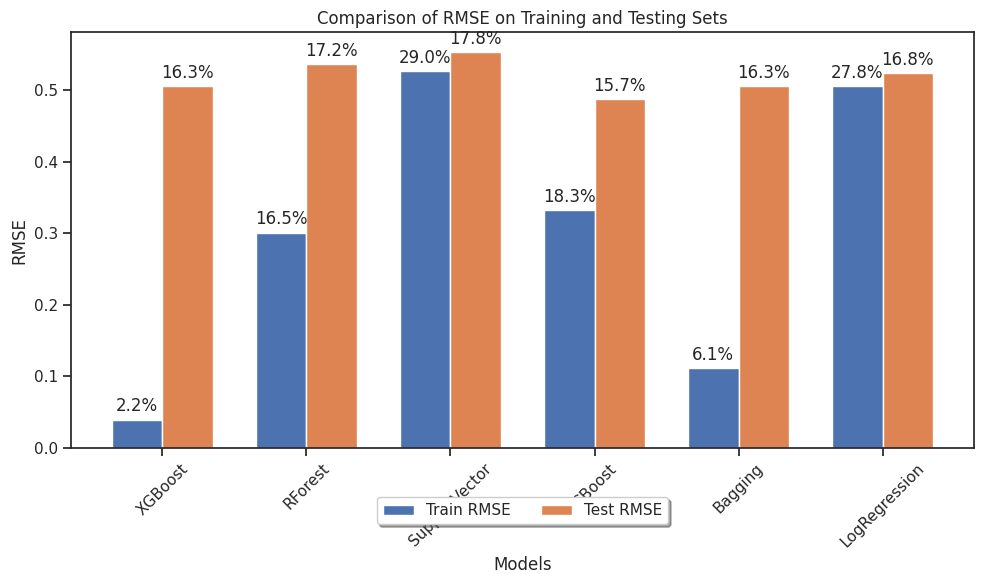

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE values for training and testing sets
rmse_train = [calculate_rmse(y_train, predictions_train_xgb),
              calculate_rmse(y_train, predictions_train_rf),
              calculate_rmse(y_train, predictions_train_svc),
              calculate_rmse(y_train, predictions_train_gb),
              calculate_rmse(y_train, predictions_train_bag),
              calculate_rmse(y_train, predictions_train_log_reg)]

rmse_test = [calculate_rmse(y_test, predictions_test_xgb),
             calculate_rmse(y_test, predictions_test_rf),
             calculate_rmse(y_test, predictions_test_svc),
             calculate_rmse(y_test, predictions_test_gb),
             calculate_rmse(y_test, predictions_test_bag),
             calculate_rmse(y_test, predictions_test_log_reg)]

models = ['XGBoost', 'RForest', 'SupportVector', 'GBoost', 'Bagging','LogRegression']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar_train = ax.bar(index, rmse_train, bar_width, label='Train RMSE')
bar_test = ax.bar(index + bar_width, rmse_test, bar_width, label='Test RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Comparison of RMSE on Training and Testing Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Add percentage values to each bar
for bar, rmse_val in zip(bar_train, rmse_train):
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format((rmse_val / sum(rmse_train)) * 100),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar, rmse_val in zip(bar_test, rmse_test):
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format((rmse_val / sum(rmse_test)) * 100),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()

# Add legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
plt.show()



**Precision** (After hyper parameter tuning)

In [ ]:
print('Precision XGBoost...{}'.format(precision_score(y_train,predictions_train_xgb)))
print('Precision RForest...{}'.format(precision_score(y_train,predictions_train_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_train,predictions_train_svc)))
print('Precision GBoost...{}'.format(precision_score(y_train,predictions_train_gb)))
print('Precision Bagging...{}'.format(precision_score(y_train,predictions_train_bag)))
print('Precision LogRegression...{}'.format(precision_score(y_train,predictions_train_log_reg)))

Precision XGBoost...1.0
Precision RForest...0.9930715935334873
Precision SupportVector...0.896640826873385
Precision GBoost...0.9385593220338984
Precision Bagging...0.9937888198757764
Precision LogRegression...0.8689655172413793


In [ ]:
print('Precision XGBoost...{}'.format(precision_score(y_test,predictions_test_xgb)))
print('Precision RForest...{}'.format(precision_score(y_test,predictions_test_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_test,predictions_test_svc)))
print('Precision GBoost...{}'.format(precision_score(y_test,predictions_test_gb)))
print('Precision Bagging...{}'.format(precision_score(y_test,predictions_test_bag)))
print('Precision LogRegression...{}'.format(precision_score(y_test,predictions_test_log_reg)))

Precision XGBoost...0.7936507936507936
Precision RForest...0.8285714285714286
Precision SupportVector...0.84375
Precision GBoost...0.8468468468468469
Precision Bagging...0.8135593220338984
Precision LogRegression...0.8198198198198198


**Recall** (After hyper parameter tuning)

In [ ]:
print('Recall XGBoost...{}'.format(recall_score(y_train,predictions_train_xgb)))
print('Recall RForest...{}'.format(recall_score(y_train,predictions_train_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_train,predictions_train_svc)))
print('Recall GBoost...{}'.format(recall_score(y_train,predictions_train_gb)))
print('Recall Bagging...{}'.format(recall_score(y_train,predictions_train_bag)))
print('Recall LogRegression...{}'.format(recall_score(y_train,predictions_train_log_reg)))

Recall XGBoost...0.9979381443298969
Recall RForest...0.8865979381443299
Recall SupportVector...0.7154639175257732
Recall GBoost...0.9134020618556701
Recall Bagging...0.9896907216494846
Recall LogRegression...0.7793814432989691


In [ ]:
print('Recall XGBoost...{}'.format(recall_score(y_test,predictions_test_xgb)))
print('Recall RForest...{}'.format(recall_score(y_test,predictions_test_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_test,predictions_test_svc)))
print('Recall GBoost...{}'.format(recall_score(y_test,predictions_test_gb)))
print('Recall Bagging...{}'.format(recall_score(y_test,predictions_test_bag)))
print('Recall LogRegression...{}'.format(recall_score(y_test,predictions_test_log_reg)))

Recall XGBoost...0.8695652173913043
Recall RForest...0.7565217391304347
Recall SupportVector...0.7043478260869566
Recall GBoost...0.8173913043478261
Recall Bagging...0.8347826086956521
Recall LogRegression...0.7913043478260869


**Confusion matrix** (After hyper parameter tuning)

In [ ]:
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))

print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test, rf_clf.predict(X_test)))

print('SupportVector_Confusion Matrix')
print(confusion_matrix(y_test, svc_clf.predict(X_test)))

print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test, gb_clf.predict(X_test)))

print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test, bag_clf.predict(X_test)))

print('LogRegression_Confusion Matrix')
print(confusion_matrix(y_test, log_reg.predict(X_test)))


XGBoost_Confusion Matrix
[[ 19  26]
 [ 15 100]]
RandomForest_Confusion Matrix
[[27 18]
 [28 87]]
SupportVector_Confusion Matrix
[[30 15]
 [34 81]]
GradientBoosting_Confusion Matrix
[[28 17]
 [21 94]]
Bagging_Confusion Matrix
[[23 22]
 [19 96]]
LogRegression_Confusion Matrix
[[25 20]
 [24 91]]


In [ ]:
# Get feature importances
importances = gb_clf.feature_importances_

# Calculate total importance
total_importance = sum(importances)

# Calculate importance percentages and store them with feature names
importance_percentages = [(feature_name, (importance / total_importance) * 100) for feature_name, importance in zip(X_train.columns, importances)]

# Sort feature importances in descending order
importance_percentages_sorted = sorted(importance_percentages, key=lambda x: x[1], reverse=True)

# Print feature importances in descending order
print("Feature importances (as percentages) in descending order:")
for feature_name, importance_percentage in importance_percentages_sorted:
    print(f"{feature_name}: {importance_percentage:.2f}%")

Feature importances (as percentages) in descending order:
status: 35.39%
credit_history: 9.99%
duration: 8.63%
age: 6.88%
log_amount: 6.17%
savings: 5.58%
purpose: 4.40%
other_installment_plans: 3.70%
personal_status_sex: 3.32%
employment_duration: 3.16%
other_debtors: 2.94%
installment_rate: 2.16%
present_residence: 1.98%
telephone: 1.43%
job: 1.21%
property: 1.16%
housing: 0.87%
people_liable: 0.65%
foreign_worker: 0.20%
number_credits: 0.20%
